In [187]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn import tree
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge, RidgeCV,Lasso
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold,LeaveOneOut, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn import *

In [188]:
# Read the data set and get a breif look at the values 
data = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")

nrows,ncols = data.shape
print(data.describe())
data.head()
print(data.isnull().sum())
data.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
partyNames = data['Name'].str.rpartition('.')
#partyNames.str.rpartition('.')
namesDf = pd.DataFrame(data=partyNames[0])
tempDf = namesDf.squeeze().str.rpartition(', ')
newDf = pd.DataFrame({"Party":tempDf[:][0],"Prefix":tempDf[:][2]})
#partyNames.head()
#partyKey = partyNames.unique()
#partyKey0


newData = pd.concat([data, newDf], axis = 1)
newData.head()
#newData=newData.drop(['1'],axis = 1) 
newData.rename(columns = {'0':'Party', '2':'Prefix'}, inplace = True)
newData.head()
newData.to_csv("modTrain.csv")
newData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


In [190]:
data.head()
dep = data[['Survived']]
ind = pd.get_dummies(newData, columns = ['Embarked','Sex','Pclass','Prefix']).drop(['Survived','Ticket','Cabin','Name','Party'],axis = 1) # Encode the categorical features
ind.describe()

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Prefix_Miss,Prefix_Mlle,Prefix_Mme,Prefix_Mr,Prefix_Mrs,Prefix_Mrs. Martin (Elizabeth L,Prefix_Ms,Prefix_Rev,Prefix_Sir,Prefix_the Countess
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.352413,0.647587,...,0.204265,0.002245,0.001122,0.580247,0.139169,0.001122,0.001122,0.006734,0.001122,0.001122
std,257.353842,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.477990,0.477990,...,0.403390,0.047351,0.033501,0.493796,0.346318,0.033501,0.033501,0.081830,0.033501,0.033501
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [191]:
# Impute missing data values
print(data.isnull().sum())
ageMissing = ind[['Age','SibSp','Parch']].values.reshape(nrows,3)
imp = IterativeImputer(max_iter = 10, random_state = 0)
imp.fit(ageMissing)
imputedAges = (imp.transform(ageMissing))
ind[['Age','SibSp','Parch']] = imputedAges
ind.head()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Prefix_Miss,Prefix_Mlle,Prefix_Mme,Prefix_Mr,Prefix_Mrs,Prefix_Mrs. Martin (Elizabeth L,Prefix_Ms,Prefix_Rev,Prefix_Sir,Prefix_the Countess
0,1,22.0,1.0,0.0,7.2500,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,38.0,1.0,0.0,71.2833,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,26.0,0.0,0.0,7.9250,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,4,35.0,1.0,0.0,53.1000,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,35.0,0.0,0.0,8.0500,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [192]:
def cleanData(data,data2,isTest):
    data = pd.concat([data2, data]) 
    if(isTest == False):
        ind = pd.get_dummies(data, columns = ['Embarked','Sex','Prefix']).drop(['Survived','Ticket','Cabin','Name','Party','TicketNum','TicketStr'],axis = 1) # Encode the categorical features
        ind.drop(ind.columns[[0, 1, 2,9,10]], axis = 1, inplace = True)
    else:
        ind = pd.get_dummies(data, columns = ['Embarked','Sex','Prefix']).drop(['Ticket','Cabin','Name','Party','TicketNum','TicketStr'],axis = 1) # Encode the categorical features
        #ind.drop(ind.columns[[0,1,2,10]], axis = 1, inplace = True)
    
    return ind

In [193]:
# # Read the new data set 
newData = pd.read_csv("train_WithPredictedAges.csv")
newDataTest = pd.read_csv("testReal3.csv")
#indTest = cleanData(newDataTest,ind)
full = cleanData(newData,newDataTest,False)
indices = newDataTest['PassengerId']
indTest = full.iloc[0:418,:]
ind = full.iloc[418:1310,:]
#print(ind.head())
#print(ind.isnull().sum())
#ind
#print(indTest.isnull().sum())
#indTest.head()
#ind.head()
#len(dep)
#len(ind)
indTest


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,...,Prefix_ Master,Prefix_ Miss,Prefix_ Mlle,Prefix_ Mme,Prefix_ Mr,Prefix_ Mrs,Prefix_ Ms,Prefix_ Rev,Prefix_ Sir,Prefix_Countess
0,892,3,34.500000,0,0,7.8292,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,893,3,47.000000,1,0,7.0000,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,894,2,62.000000,0,0,9.6875,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,895,3,27.000000,0,0,8.6625,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,896,3,22.000000,1,1,12.2875,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,32.758457,0,0,8.0500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
414,1306,1,39.000000,0,0,108.9000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,38.500000,0,0,7.2500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
416,1308,3,32.418390,0,0,8.0500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [194]:
# Validation split
X_train, X_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=1)

In [195]:
def computeMetrics(model,ind,dep,indTest):
    #plt.figure(figsize = (25,25))
    
    # Metrics using 80/20 split
    # X_train, X_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=1)
    # pred=model.predict(X_test)
    # cfMat = confusion_matrix(y_test,pred)
    # acc = (cfMat[1,1] + cfMat[0,0])/(cfMat[1,1]+cfMat[0,0]+cfMat[0,1]+cfMat[1,0])
    # cfDf = pd.DataFrame(data=cfMat, index = ["Negative","Positive"], columns = ["Negative","Positive"])
    # fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
    # print("Acc",acc)
    # print(cfDf)
    # print("AUC:",metrics.auc(fpr, tpr))
    # roc_auc = metrics.auc(fpr, tpr)
    # display=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
    # display.plot()
    
    # Metrics using CV = 6
    X = ind 
    y = np.asarray(dep).ravel()

    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=10)
    #classifier = svm.SVC(kernel="linear", probability=True, random_state=0)

    tprs = []
    aucs = []
    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    #fig = plt.figure(25,20)
    for i, (train, test) in enumerate(cv.split(X, y)):
        #print((train,test))
        xx = X.loc[train,:]
        xxTest = X.loc[test,:]
        yy = y[np.asarray(train)]
        yyTest = y[np.asarray(test)]
        classifier=model.fit(xx, yy)
        ypred=classifier.predict(xxTest)

        cfMat = confusion_matrix(yyTest,ypred)
        acc1 = (cfMat[1,1] + cfMat[0,0])/(cfMat[1,1]+cfMat[0,0]+cfMat[0,1]+cfMat[1,0])
        accs.append(acc1)
        fpr, tpr, thresholds = metrics.roc_curve(yyTest, ypred, pos_label=1,drop_intermediate=False)

        roc_auc = metrics.auc(fpr, tpr)
        viz=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name="ROC fold {}".format(i),pos_label = 1)
        viz.plot(ax = ax)
    #viz = RocCurveDisplay.from_estimator(clf,X.loc[test,:],y[np.asarray(test)],name="ROC fold {}".format(i),alpha=0.3,lw=1,ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
    print("Acc Mean: ",np.mean(accs))
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    finalPredicted = classifier.predict(indTest)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic {}".format(model),
    )
    plt.gcf().set_size_inches(8, 7)
    ax.legend(loc="lower right")
    plt.show()
    
    return finalPredicted
    

SCORE: 0.8426966292134831
Acc Mean:  0.8271535580524345


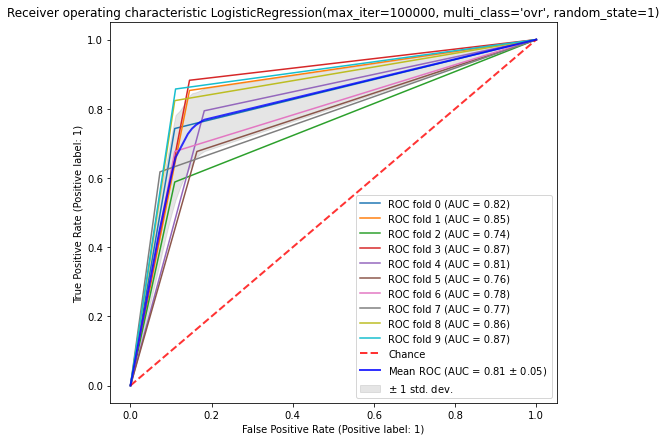

In [196]:

# Logistic Regresssion 
log = LogisticRegression(max_iter = 100000,solver='lbfgs',multi_class='ovr',dual=False,random_state=1)
log_1 = log.fit(X_train,np.asarray(y_train).ravel())
print("SCORE:",log_1.score(X_train,y_train))
final_Log_Pred = computeMetrics(log,ind,dep,indTest)
# pred = log_1.predict(X_test)

SCORE: 1.0
Acc Mean:  0.7700499375780274


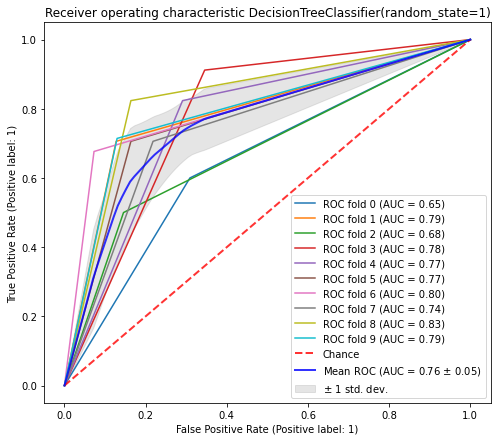

In [197]:
# Decision Tree Classifier 
dtc = DecisionTreeClassifier(random_state = 1)
dtc_1 = dtc.fit(X_train,y_train)
print("SCORE:",dtc_1.score(X_train,y_train))
# pred = dtc_1.predict(X_test)
final_DT_Pred = computeMetrics(dtc,ind,dep, indTest)

In [198]:
# fig = plt.figure(figsize=(25,15))
# _ = tree.plot_tree(dtc_1, 
#                    #feature_names=ind.feature_names,  
#                    #class_names=dep.target_names,
#                    filled=True)

SCORE: 0.8455056179775281
Acc Mean:  0.8338826466916354


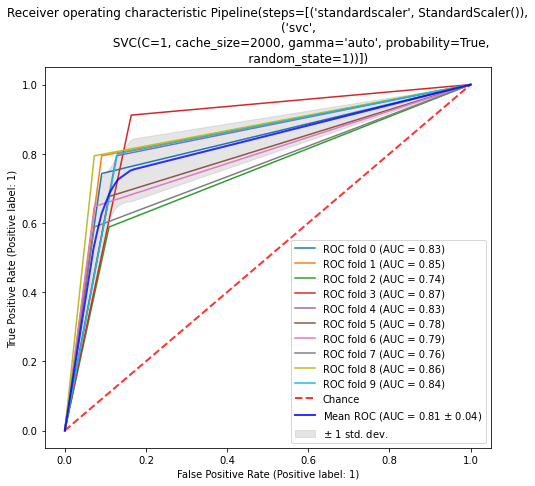

In [199]:
# Support Vector Machine gamma: 1e-06, C = 10000
clf = make_pipeline(StandardScaler(), SVC(C = 1, kernel = 'rbf', gamma='auto', probability = True, random_state = 1, cache_size = 2000))
svm = clf.fit(X_train,np.asarray(y_train).ravel())
print("SCORE:",svm.score(X_train,np.asarray(y_train).ravel()))
# pred = svm.predict(X_test)
final_SVM_pred = computeMetrics(clf,ind,dep,indTest)

In [200]:
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# grid.fit(ind, np.asarray(dep).ravel())

# print(
#     "The best parameters are %s with a score of %0.2f"
#     % (grid.best_params_, grid.best_score_)
# )

SCORE: 0.9929775280898876
Acc Mean:  0.8271910112359551


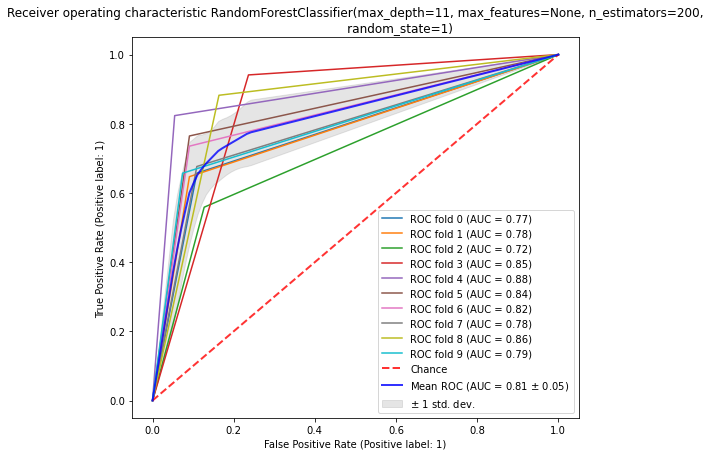

In [201]:
# Random Forest
clf_RF = RandomForestClassifier(max_depth=11,random_state=1,max_features=None,n_estimators=200)
randFor = clf_RF.fit(X_train,np.asarray(y_train).ravel())
print("SCORE:",randFor.score(X_train,np.asarray(y_train).ravel()))
# pred = randFor.predict(X_test)
final_RF_Pred = computeMetrics(clf_RF,ind,dep,indTest)


In [202]:
#RocCurveDisplay.from_estimator(clf_RF,X_train,np.assarray(y_train).ravel())

In [203]:
len(final_DT_Pred)

418

In [204]:
len(final_Log_Pred)
#seq(892,
#pd.DataFrame(data=final_Log_Pred, columns = ["PassengerID","Survived"]).to_csv("logPred.csv")
def writePred():
    ids = range(892,1310)
    list = ["final_Log_Pred","final_DT_Pred","final_SVM_Pred","final_RF_Pred"]
    listn = [final_Log_Pred,final_DT_Pred,final_SVM_pred,final_RF_Pred]
    for i in range(4):
        pd.DataFrame({"PassengerID":ids,"Survived":listn[i]}).to_csv(list[i],index = False)

In [205]:
writePred()